# 26.6 - GMM Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture


warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Question 1

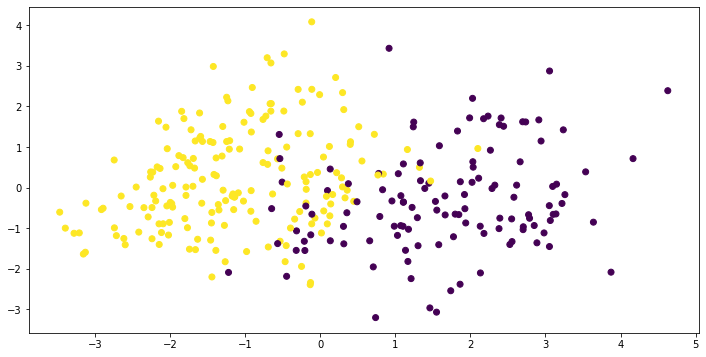

In [3]:
gmm = GaussianMixture(n_components=2, random_state=27)
clusters = gmm.fit_predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in pca], [x[1] for x in pca], c=clusters)
plt.show()

In [4]:
print('ARI score:  {}'.format(metrics.adjusted_rand_score(y,clusters)))
print('Silhouette: {}'.format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score:  0.4207322145049338
Silhouette: 0.16118591340148433


This outperforms hierarchical clustering by both measures, and KMeans by ARI score.

## Question 2

In [6]:
def try_gmm(n=2, rs=27, cov='full'):
    gmm = GaussianMixture(n_components=n, random_state=rs, covariance_type=cov)
    clusters = gmm.fit_predict(X_std)
    pca = PCA(n_components=2).fit_transform(X_std)
    print('ARI score:  {}'.format(metrics.adjusted_rand_score(y,clusters)))
    print('Silhouette: {}'.format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

try_gmm(cov='tied')

ARI score:  0.4558104186161976
Silhouette: 0.1671559472293439


In [7]:
try_gmm(cov='diag')

ARI score:  0.37878842718089933
Silhouette: 0.15836933745078682


In [8]:
try_gmm(cov='spherical')

ARI score:  0.20765243525722465
Silhouette: 0.12468753110276873


'Full' covariance setting worked better by both metrics.